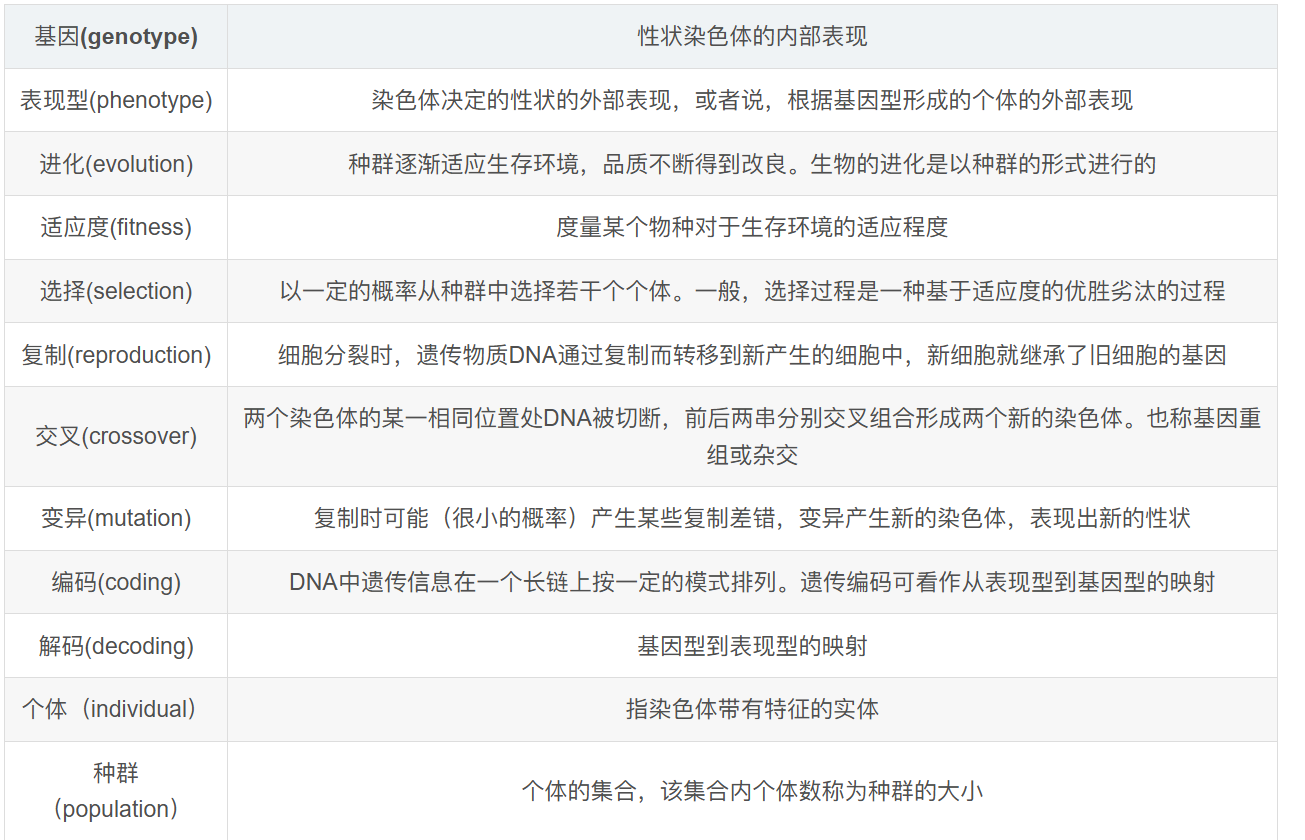
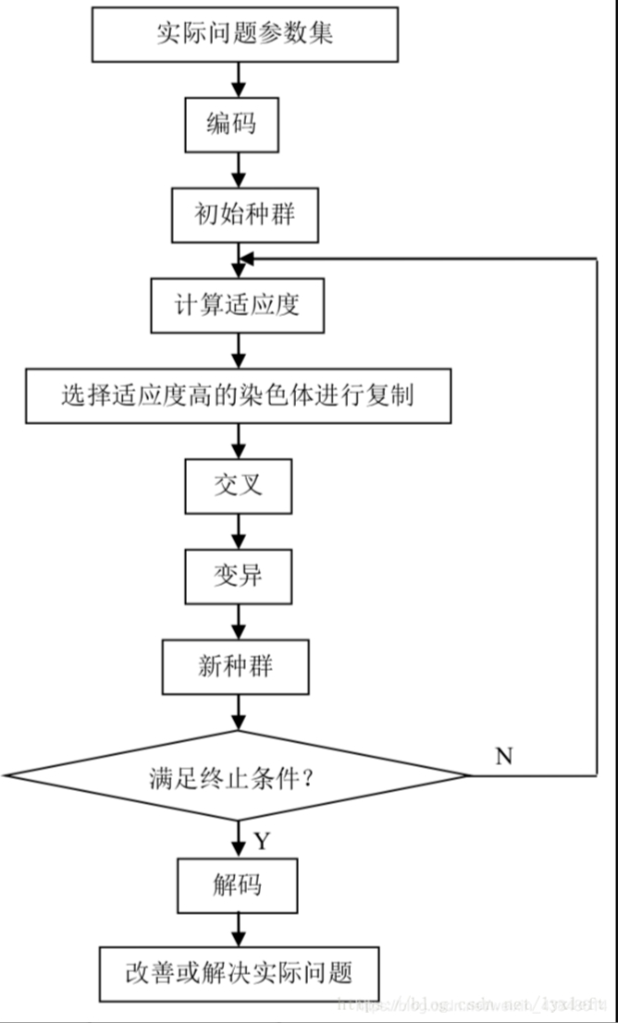

# 基本方法
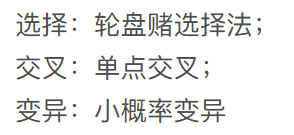

In [8]:
import random
 
# 适应度函数
def fitness(x):
    return x ** 2
 
# 选择
def select(population, scores, k=3):
    # 轮盘赌选择
    selection_ix = random.randint(0, len(population)-1)
    for ix in random.sample(range(len(population)), k):
        if scores[ix] > scores[selection_ix]:
            selection_ix = ix
    return population[selection_ix]
 
# 交叉
def crossover(p1, p2, r_cross):
    # 单点交叉
    c1, c2 = p1.copy(), p2.copy()
    if random.random() < r_cross:
        pt = random.randint(1, len(p1)-2)
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]
 
# 变异
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if random.random() < r_mut:
            bitstring[i] = 1 - bitstring[i]
 
# 遗传算法
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # 初始种群
    population = [[random.randint(0, 1) for _ in range(n_bits)] for _ in range(n_pop)]
    best, best_eval = 0, objective(int("".join(str(x) for x in population[0]), 2))
    for gen in range(n_iter):
        # 评估所有候选
        scores = [objective(int("".join(str(x) for x in candidate), 2)) for candidate in population]
        for i in range(n_pop):
            if scores[i] > best_eval:
                best, best_eval = population[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen, "".join(str(x) for x in population[i]), scores[i]))
        # 选择下一代
        selected = [select(population, scores) for _ in range(n_pop)]
        # 创建下一代
        children = list()
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
        population = children
    return [best, best_eval]
 
# 定义问题参数
n_iter = 100
n_bits = 5
n_pop = 100
r_cross = 0.9
r_mut = 1.0 / float(n_bits)
 
# 执行遗传算法
best, score = genetic_algorithm(fitness, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('Best Solution: %s, Score: %.3f' % ("".join(str(x) for x in best), score))

>0, new best f(11111) = 961.000000
Done!
Best Solution: 11111, Score: 961.000


最优适应度: 370
最优适应度: 382
最优适应度: 411
最优适应度: 462
最优适应度: 483
最优适应度: 502
最优适应度: 502
最优适应度: 523
最优适应度: 542
最优适应度: 542
最优适应度: 542
最优适应度: 563
最优适应度: 586
最优适应度: 607
最优适应度: 609
最优适应度: 609
最优适应度: 630
最优适应度: 651
最优适应度: 651
最优适应度: 655
最优适应度: 659
最优适应度: 678
最优适应度: 699
最优适应度: 699
最优适应度: 699
最优适应度: 699
最优适应度: 724
最优适应度: 724
最优适应度: 747
最优适应度: 774
最优适应度: 774
最优适应度: 803
最优适应度: 830
最优适应度: 828
最优适应度: 836
最优适应度: 859
最优适应度: 861
最优适应度: 886
最优适应度: 911
最优适应度: 911
最优适应度: 944
最优适应度: 948
最优适应度: 967
最优适应度: 996
最优适应度: 1002
最优适应度: 1031
最优适应度: 1031
最优适应度: 1043
最优适应度: 1068
最优适应度: 1058


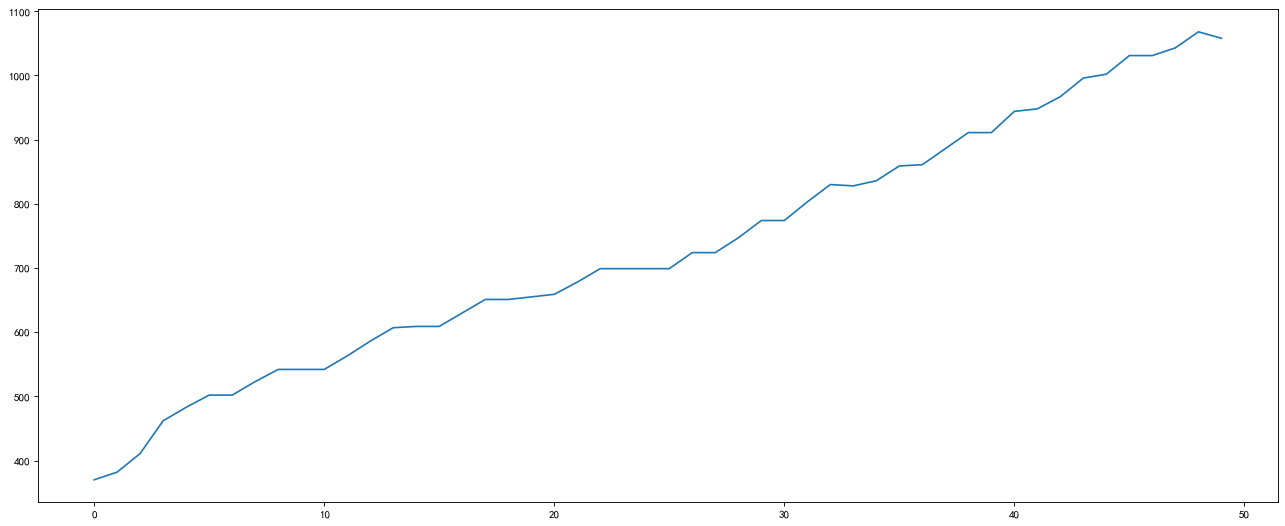

最优个体基因: [-13, 15, -14, -12, -18]


In [30]:
import random
import matplotlib.pyplot as plt

# 定义个体类，代表种群中的一个个体
class Individual:
    def __init__(self, genes):
        self.genes = genes  # 个体的基因序列
        self.fitness = self.calculate_fitness()  # 个体的适应度

    def calculate_fitness(self):
        # 计算适应度函数，这里以基因的平方和为例
        # 适应度函数应根据具体问题进行定义
        return sum(x ** 2 for x in self.genes)

# 初始化种群
def initialize_population(size, gene_length):
    # size: 种群的大小
    # gene_length: 个体基因序列的长度
    # 生成初始种群，每个个体由随机生成的基因序列组成
    return [Individual([random.randint(-10, 10) for _ in range(gene_length)]) for _ in range(size)]

# 选择过程
def selection(population, num_parents):
    # 根据适应度排序，选择适应度最高的个体作为父母
    # population: 当前种群
    # num_parents: 选择的父母数量
    sorted_population = sorted(population, key=lambda x: x.fitness, reverse=True)
    return sorted_population[:num_parents]

# 交叉过程
def crossover(parent1, parent2):
    # 单点交叉
    # parent1, parent2: 选择的两个父本个体
    # 随机选择交叉点，交换父本基因，生成两个子代
    point = random.randint(1, len(parent1.genes) - 1)
    child1_genes = parent1.genes[:point] + parent2.genes[point:]
    child2_genes = parent2.genes[:point] + parent1.genes[point:]
    return Individual(child1_genes), Individual(child2_genes)

# 变异过程
def mutation(individual, mutation_rate=0.01):
    # 对个体的基因序列进行随机变异
    # individual: 要变异的个体
    # mutation_rate: 变异概率
    for i in range(len(individual.genes)):
        if random.random() < mutation_rate:
            # 对每个基因位以一定的概率进行增减操作
            individual.genes[i] += random.randint(-1, 1)
    # 更新个体的适应度
    individual.fitness = individual.calculate_fitness()
best_list = []
# 遗传算法主函数
def genetic_algorithm(population_size, gene_length, num_generations):
    # population_size: 种群大小
    # gene_length: 基因长度
    # num_generations: 进化代数
    # 初始化种群
    population = initialize_population(population_size, gene_length)
    for _ in range(num_generations):
        # 选择
        parents = selection(population, population_size // 2)
        next_generation = []
        # 生成新一代
        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(parents, 2)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            next_generation.extend([child1, child2])
        population = next_generation
        # 每一代选出适应度最高的个体
        best_individual = max(population, key=lambda x: x.fitness)
        
        best_list.append(best_individual.fitness)
        print(f"最优适应度: {best_individual.fitness}")
    return best_list,best_individual

# 运行算法
best_list,best = genetic_algorithm(100, 5, 50)
plt.figure(figsize= (20,8),dpi=80)
plt.plot(range(0,50),best_list)
plt.show()
print(f"最优个体基因: {best.genes}")
